In [ ]:
!# Download YOLOv7 code
!git clone https://github.com/WongKinYiu/yolov7
%cd yolov7
!ls

# Upload the weights file
from google.colab import files

# Upload the .pt file
pt_file = files.upload()

# Save the .pt file
for name, data in pt_file.items():
    with open(name, 'wb') as f:
        f.write(data)
        print(f'Saved .pt file: {name}')

Cloning into 'yolov7'...
remote: Enumerating objects: 1185, done.
remote: Total 1185 (delta 0), reused 0 (delta 0), pack-reused 1185
Receiving objects: 100% (1185/1185), 74.23 MiB | 16.68 MiB/s, done.
Resolving deltas: 100% (512/512), done.
/content/yolov7
cfg	detect.py  hubconf.py  models	  requirements.txt  tools	  utils
data	export.py  inference   paper	  scripts	    train_aux.py
deploy	figure	   LICENSE.md  README.md  test.py	    train.py


Saving best-weights.pt to best-weights.pt
Saved .pt file: best-weights.pt


In [ ]:
#Upload the test image file
from google.colab import files

# Upload the .jpg file
jpg_file = files.upload()

# Save the .jpg file
for name, data in jpg_file.items():
    with open(name, 'wb') as f:
        f.write(data)
        print(f'Saved .jpg file: {name}')


Saving patch_Coda_della_Volpe_C_5_3.jpg to patch_Coda_della_Volpe_C_5_3.jpg
Saved .jpg file: patch_Coda_della_Volpe_C_5_3.jpg


In [ ]:
uploaded_weights = 'best-weights.pt'  # Replace with the uploaded weights filename
uploaded_image = 'patch_Coda_della_Volpe_C_5_3.jpg'  # Replace with the uploaded test image filename

Namespace(weights=['best-weights.pt'], source='patch_Coda_della_Volpe_C_5_3.jpg', img_size=768, conf_thres=0.25, iou_thres=0.45, device='', view_img=False, save_txt=False, save_conf=False, nosave=False, classes=None, agnostic_nms=False, augment=False, update=False, project='runs/detect', name='exp', exist_ok=False, no_trace=False)
YOLOR 🚀 v0.1-126-g84932d7 torch 2.0.1+cu118 CUDA:0 (Tesla T4, 15101.8125MB)

Fusing layers... 
IDetect.fuse
Model Summary: 208 layers, 6010302 parameters, 0 gradients
 Convert model to Traced-model... 
 traced_script_module saved! 
 model is traced! 

/usr/local/lib/python3.10/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3483.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
5 pruned_trees, 2 unpruned_trees, Done. (7.1ms) Inference, (2.0ms) NMS
 The image with the result is sa

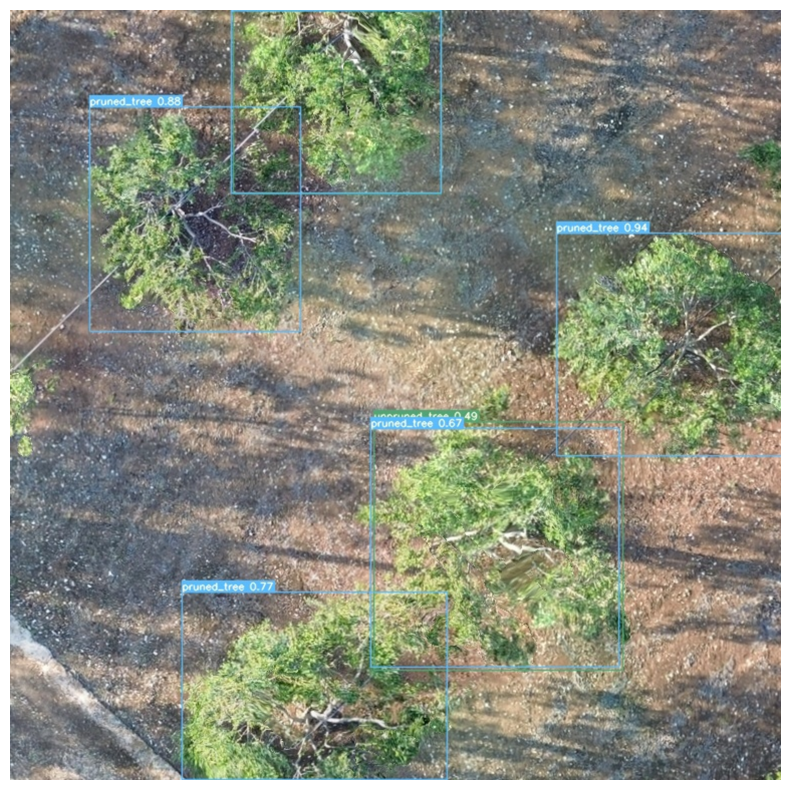

In [ ]:
!# Detection
!python detect.py --weights {uploaded_weights} --conf 0.25 --img-size 768 --source {uploaded_image}

def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image, (3 * width, 3 * height), interpolation=cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()

# Show the detected image with bounding boxes
output_path = 'runs/detect/exp/' + uploaded_image  # Adjust the output path if necessary
imShow(output_path)